In [ ]:
# Reddit API Authenticatio Use regex to remove stop words

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
    import praw

# Define user agent
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"

# Initialize Reddit instance
reddit = praw.Reddit(
    client_id="C_X3XnTFXt9kvb6jcLgTww",
    client_secret="FzKJiWJgHEJ2sdmEfiueBQLJecQUlA",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

C:\Users\anush\AppData\Local\Temp\ipykernel_27096\3422756113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'were', 'nor', 'until', 'wasn', 'into', 'hers', "mustn't", 'at', 'weren', 'do', 'on', 'most', 'against', 'own', 'during', 're', 'down', 'they', 'same', 'didn', 'having', 'aren', 'him', 'of', 'those', 'ours', 'himself', 'other', 'hadn', 'when', 'not', 'herself', 'have', "wasn't", 'about', 'that', 'both', "haven't", "you've", "it's", 'who', 'has', 'out', 'her', "hadn't", 'in', 'does', 'any', 'my', 'his', 'more', 'don', 'or', 'o', 'once', 'will', 'only', 'by', 'are', 'i', 'where', 'up', 'too', "don't", 'further', 'from', 'here', 'no', 'wouldn', 'needn', 'isn', 'it', 'for', 'as', 'she', 'mustn', 'off', "doesn't", 'itself', 'hasn', 'ourselves', 'd', "aren't", 'to', 'theirs', 'if', 'me', "you'd", 'shan', 'haven', 'above', 'ain', "you'll", 'now', 'there', "should've", 'themselves', 'through', 've', "shouldn't", 'few', 'doesn', 'whom', 'then', "that'll", 'again', 'their', 's', 'why', 'yours', 'can', 'over', 'yourself', 'its', 'under', 'each', 'than', 'while', 'them', 'am', 'won', "won't", 'su

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
headlines = set()
for submission in reddit.subreddit("Arianagrande").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

First picture of Ariana in Wicked movie from VANITY FAIR posted today 02/11/24
1aomhh8
bigboss-1964
1707696063.0
759
0.91
https://i.redd.it/3tx9esj5p1ic1.jpeg
0


In [11]:
headlines = set()
for submission in reddit.subreddit("Arianagrande").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

403


In [12]:
#Create a dataframe from the scrapped data 
grande_df = pd.DataFrame(headlines)
grande_df.head()

,0
0,Performing in gold at the 2018 Vmas
1,Power106 FM - 2013
2,Vanity Fair - 2015
3,Ariana’s bangs era lives in my head rent free
4,Happy 29th Birthday to Ariana Grande!


In [13]:
grande_df.columns

RangeIndex(start=0, stop=1, step=1)

In [14]:
grande_df.columns = ['Titles']

In [15]:
grande_df.head()

,Titles
0,Performing in gold at the 2018 Vmas
1,Power106 FM - 2013
2,Vanity Fair - 2015
3,Ariana’s bangs era lives in my head rent free
4,Happy 29th Birthday to Ariana Grande!


In [16]:
grande_df.Titles.duplicated().sum() 

0

In [19]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
grande_df["Titles"]= grande_df["Titles"].apply(cleanTxt)

#Show the clean text
grande_df.head()

,Titles
0,Performing in gold at the 2018 Vmas
1,Power106 FM - 2013
2,Vanity Fair - 2015
3,Ariana’s bangs era lives in my head rent free
4,Happy 29th Birthday to Ariana Grande!


In [20]:
3.	Create pipeline, remove stop words, word frequency analysis and word clouds. (20 points)


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install regex


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#Function to tokenize
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [22]:
import regex as re
def tokenize(text):
     # Use the 'findall' function from the 're' module to find all matches of the specified pattern in the text
    # The regular expression pattern r'[\w-]*[a-z|A-Z][\w-]*' is used to find words containing letters (case insensitive) and hyphens
    # \w matches any word character (alphanumeric character and underscore)
    # - matches a hyphen
    # [a-z|A-Z] matches any lowercase or uppercase letter
    # * matches zero or more occurrences of the preceding pattern
    # The pattern ensures that words may contain letters (case insensitive) and hyphens
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [23]:
# Define a test text string
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
 
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import nltk 
# Download the stopwords corpus from nltk
nltk.download('stopwords')
# Retrieve the set of stopwords for the English language from the nltk
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords) #removestopwords

{'were', 'nor', 'until', 'wasn', 'into', 'hers', "mustn't", 'at', 'weren', 'do', 'on', 'most', 'against', 'own', 'during', 're', 'down', 'they', 'same', 'didn', 'having', 'aren', 'him', 'of', 'those', 'ours', 'himself', 'other', 'hadn', 'when', 'not', 'herself', 'have', "wasn't", 'about', 'that', 'both', "haven't", "you've", "it's", 'who', 'has', 'out', 'her', "hadn't", 'in', 'does', 'any', 'my', 'his', 'more', 'don', 'or', 'o', 'once', 'will', 'only', 'by', 'are', 'i', 'where', 'up', 'too', "don't", 'further', 'from', 'here', 'no', 'wouldn', 'needn', 'isn', 'it', 'for', 'as', 'she', 'mustn', 'off', "doesn't", 'itself', 'hasn', 'ourselves', 'd', "aren't", 'to', 'theirs', 'if', 'me', "you'd", 'shan', 'haven', 'above', 'ain', "you'll", 'now', 'there', "should've", 'themselves', 'through', 've', "shouldn't", 'few', 'doesn', 'whom', 'then', "that'll", 'again', 'their', 's', 'why', 'yours', 'can', 'over', 'yourself', 'its', 'under', 'each', 'than', 'while', 'them', 'am', 'won', "won't", 'su

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
#function to remove stop words
# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [27]:
pip install pipeline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pipeline = [str.lower, tokenize, remove_stop]
#pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [90]:
grande_df['tokens'] = grande_df['Titles'].apply(prepare, pipeline=pipeline)
#runpipeline

In [92]:
grande_df['num_tokens'] = grande_df['tokens'].map(len)
grande_df.tail()
#countthetokens

,Titles,Subjectivity,Polarity,Insight,tokens,num_tokens
398,KISSFM UK - 12-03-2014,0.000000,0.000000,Neutral,"[kissfm, uk]",2
399,"Billboard Women In Music 2018 , NY 06.12.2018",0.000000,0.000000,Neutral,"[billboard, women, music, ny]",4
400,Cosmopolitan photoshoot (2017),0.100000,0.000000,Neutral,"[cosmopolitan, photoshoot]",2
401,A new Ariana picture from her instagram,0.454545,0.136364,Positive,"[new, ariana, picture, instagram]",4
402,Performs at KIIS FM's Jingle Ball in Los Angel...,0.000000,0.000000,Neutral,"[performs, kiis, fm, jingle, ball, los, angeles]",7


In [93]:
grande_df['num_tokens'] = grande_df['tokens'].map(len)
grande_df.tail()
#countthetokens

,Titles,Subjectivity,Polarity,Insight,tokens,num_tokens
398,KISSFM UK - 12-03-2014,0.000000,0.000000,Neutral,"[kissfm, uk]",2
399,"Billboard Women In Music 2018 , NY 06.12.2018",0.000000,0.000000,Neutral,"[billboard, women, music, ny]",4
400,Cosmopolitan photoshoot (2017),0.100000,0.000000,Neutral,"[cosmopolitan, photoshoot]",2
401,A new Ariana picture from her instagram,0.454545,0.136364,Positive,"[new, ariana, picture, instagram]",4
402,Performs at KIIS FM's Jingle Ball in Los Angel...,0.000000,0.000000,Neutral,"[performs, kiis, fm, jingle, ball, los, angeles]",7


In [94]:
#Word frequencyAnalysis
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")
#using counterq
testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [95]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)
#aading new data to the counter

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [96]:
#using counter
counter = Counter()
grande_df['tokens'].map(counter.update)
print(counter.most_common(5))

[('ariana', 46), ('beauty', 41), ('r', 28), ('e', 28), ('happy', 25)]


In [97]:
#Word Frequency
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [98]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10) #sort and display

,freq
token,
ariana,46
beauty,41
e,28
r,28
happy,25
performing,24
new,24
music,24
instagram,22


In [99]:
freq_df.describe()
#stats

,freq
count,599.000000
mean,2.500835
std,4.174246
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,46.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

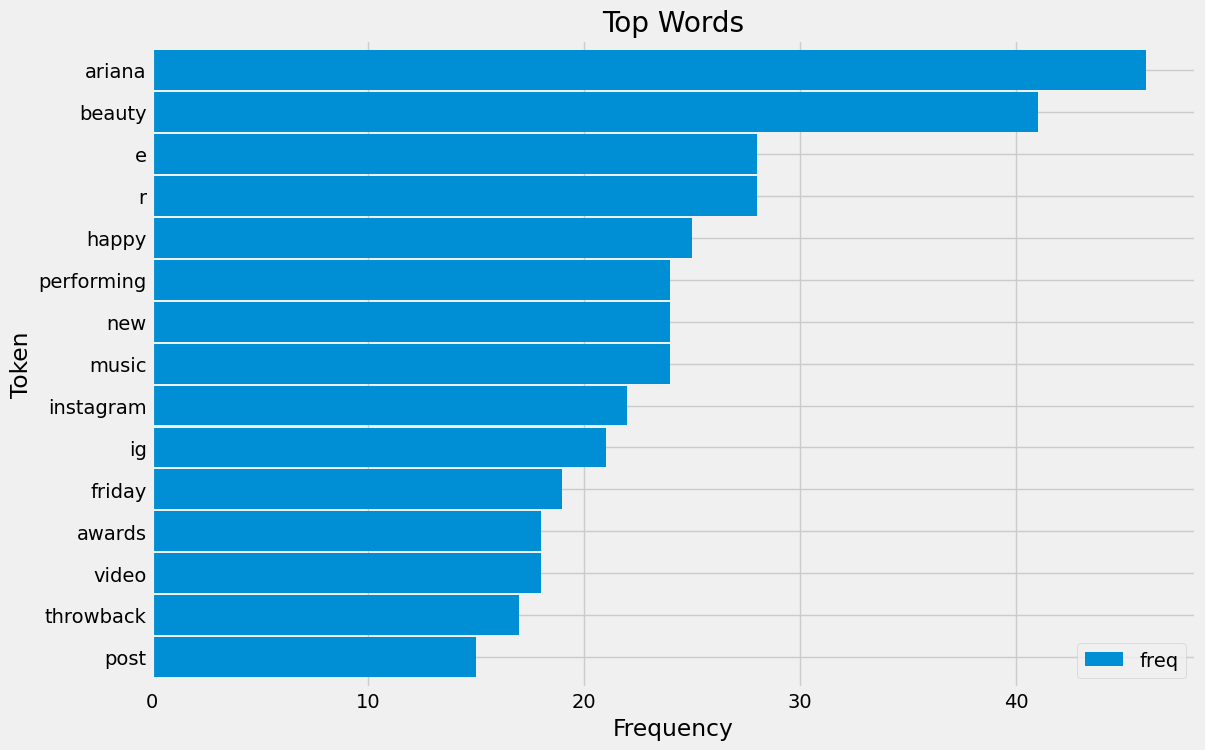

In [100]:
#barchart
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis() 
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [47]:
pip install Wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


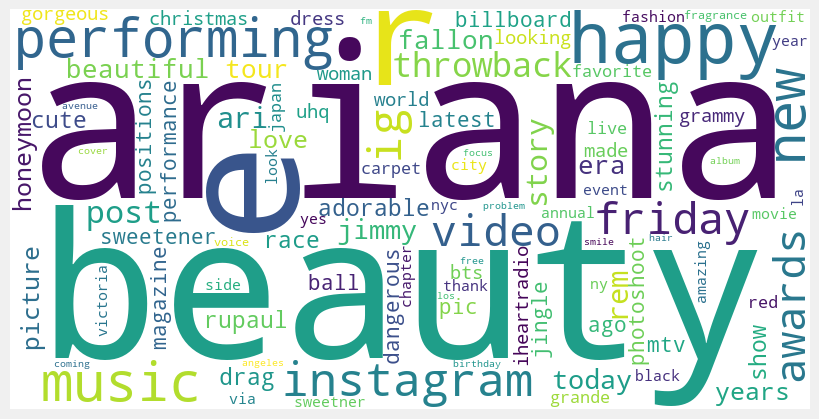

In [103]:
wc = WordCloud(background_color='white', width = 800, height=400, max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
# Displaying the word cloud image
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
#all data

5.	Sentiment analysis. (20 points)

In [52]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [105]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
grande_df['Subjectivity'] = grande_df['Titles'].apply(getSubjectivity)
grande_df['Polarity'] = grande_df['Titles'].apply(getPolarity)

#Now display data
grande_df.head()

,Titles,Subjectivity,Polarity,Insight,tokens,num_tokens
0,Performing in gold at the 2018 Vmas,0.0,0.0,Neutral,"[performing, gold, vmas]",3
1,Power106 FM - 2013,0.0,0.0,Neutral,"[power106, fm]",2
2,Vanity Fair - 2015,0.9,0.7,Positive,"[vanity, fair]",2
3,Ariana’s bangs era lives in my head rent free,0.8,0.4,Positive,"[ariana, bangs, era, lives, head, rent, free]",7
4,Happy 29th Birthday to Ariana Grande!,1.0,1.0,Positive,"[happy, 29th, birthday, ariana, grande]",5


In [56]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
grande_df["Insight"] = grande_df["Polarity"].apply(getInsight)

grande_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Performing in gold at the 2018 Vmas,0.000000,0.000000,Neutral
1,Power106 FM - 2013,0.000000,0.000000,Neutral
2,Vanity Fair - 2015,0.900000,0.700000,Positive
3,Ariana’s bangs era lives in my head rent free,0.800000,0.400000,Positive
4,Happy 29th Birthday to Ariana Grande!,1.000000,1.000000,Positive
5,Throwback - 8 Years Ago Today,0.000000,0.000000,Neutral
6,Diver City - Tokyo Japan - 09-14-2014,0.000000,0.000000,Neutral
7,Most Requested Live - 05-21-2016,0.500000,0.318182,Positive
8,Adorable Look,1.000000,0.500000,Positive
9,Ariana at the 2018 Met Gala,0.000000,0.000000,Neutral


In [106]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

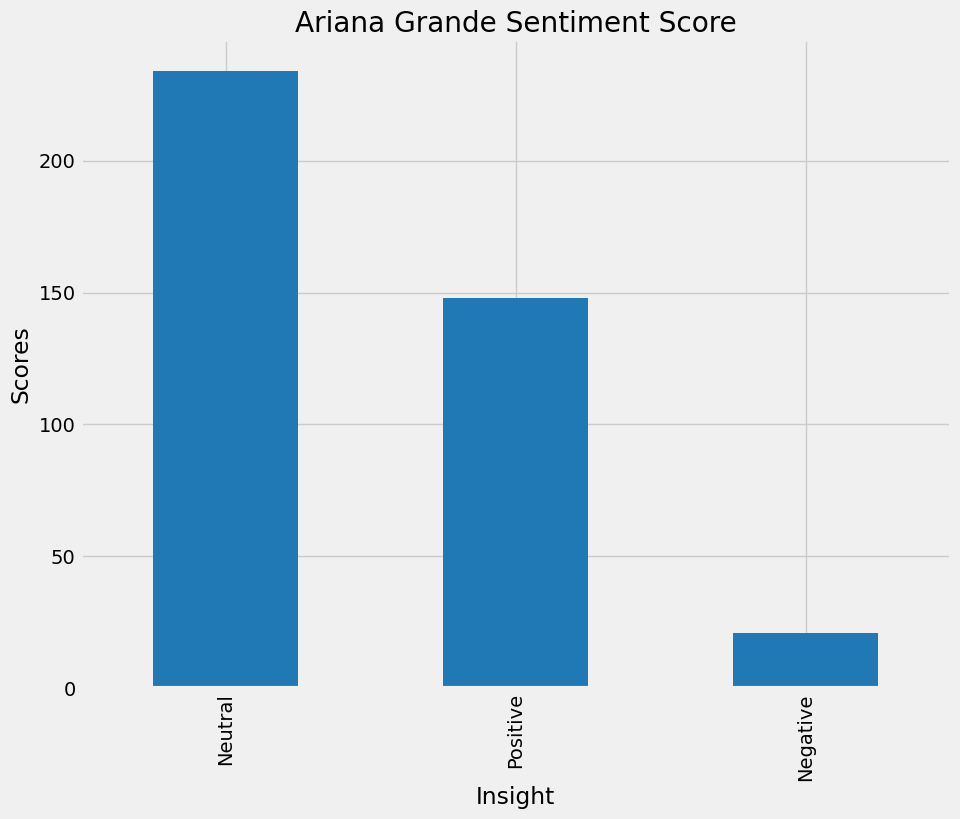

In [61]:
#Plot the values count of sentiment
plt.title("Ariana Grande Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
grande_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

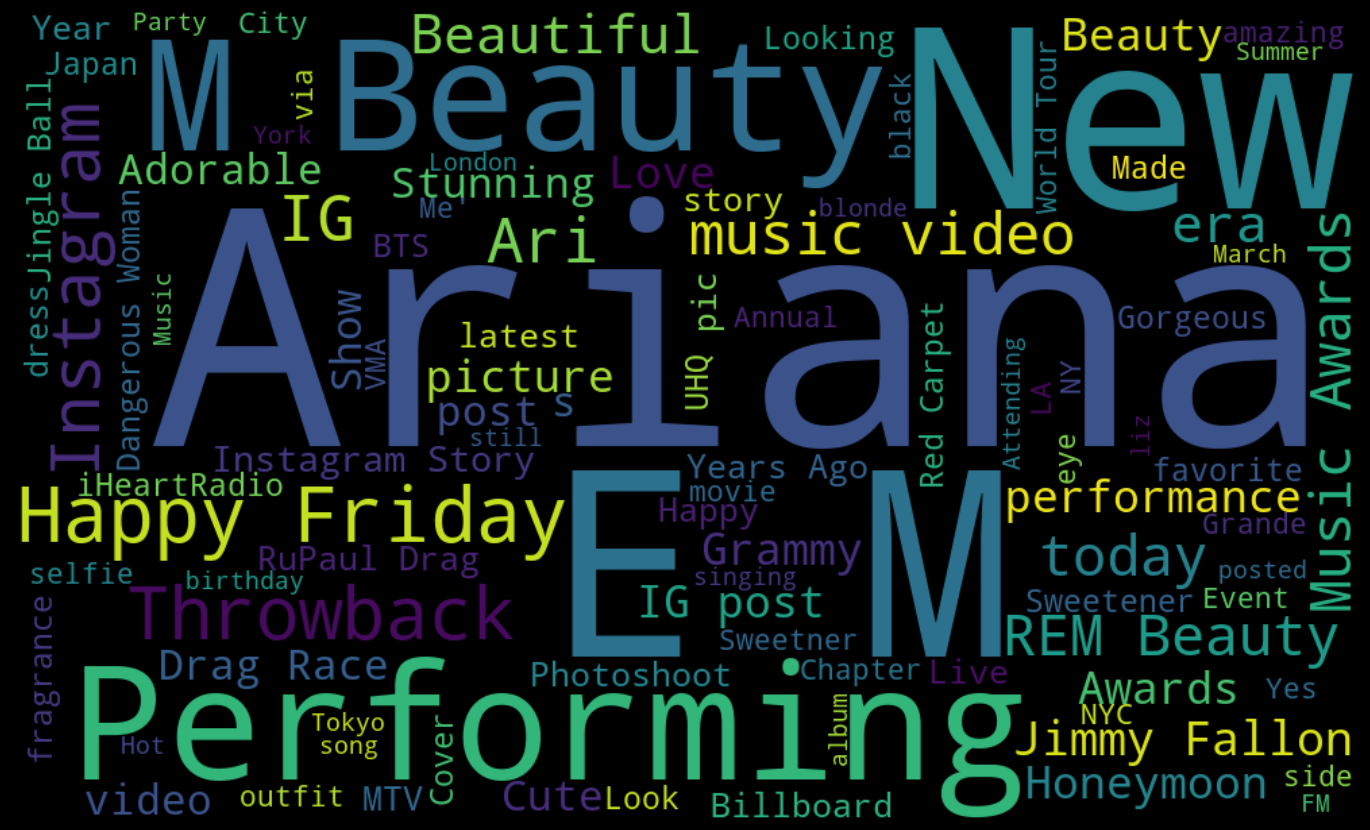

In [107]:
text = ' '.join( [twts for twts in grande_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

6.	Bing liu score. (20 points)

In [68]:
pip install nltk


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.3/10.6 MB 3.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.6 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 7.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.6 MB 10.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.6 MB 13.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.1/10.6 MB 15.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.6 MB 18.3 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [125]:
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [127]:

#Create the “Dictionary”
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
grande_df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [129]:

#Function to do the math
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  

In [130]:
grande_df['Titles'].fillna('no review', inplace=True)
grande_df['Bing_Liu_Score'] = grande_df['Titles'].apply(bing_liu_score)

C:\Users\anush\AppData\Local\Temp\ipykernel_27096\1567802090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grande_df['Titles'].fillna('no review', inplace=True)


In [131]:
grande_df[["Titles", 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,Performing in gold at the 2018 Vmas,1
1,Power106 FM - 2013,0
2,Vanity Fair - 2015,0
3,Ariana’s bangs era lives in my head rent free,1
4,Happy 29th Birthday to Ariana Grande!,1
5,Throwback - 8 Years Ago Today,0
6,Diver City - Tokyo Japan - 09-14-2014,0
7,Most Requested Live - 05-21-2016,0
8,Adorable Look,1
9,Ariana at the 2018 Met Gala,0


In [132]:
grande_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
"""Dangerous Woman"" at the 2016 MTV Movie Awards, 2016-04-09",0.0
'34+35' - 11-17-2020,0.0
'7 rings' - Billboard Music Awards - 05-01-2019,1.0
'Ari by Ariana Grande' fragrance ad campaign (2015),0.0
'Baby I' - 09-06-2013,0.0
...,...
"yes, and? IS COMING IN 48 HOURS AHHHH",0.0
you already KNOW! (had to repost - answers to questions will be in comments),0.0
“34+35” Video (2020),0.0


4.	Pick 5 random strings which we will encounter in our day-to-day life as a data scientist 
and write regex to identify them and sort, provide an example and result of the regex for each string. 
(10 points this question is optional)      

In [133]:
import re
# Sample strings
strings = [
    "anushae@gmail.com",
    "203-123-4567",
    "02/14/2024",
    "/home/user/Documents/data.csv",
    "192.168.0.1"
]

In [134]:
# Regular expressions for each pattern
regex_patterns = [
    r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',  # Email Addresses
    r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b',  # Phone Numbers
    r'\b(0[1-9]|1[0-2])/(0[1-9]|[12][0-9]|3[01])/\d{4}\b',  # Date Formats (MM/DD/YYYY)
    r'^(\/[a-zA-Z0-9]+)+$',  # File Paths
    r'\b(?:\d{1,3}\.){3}\d{1,3}\b'  # IP Addresses (IPv4)
]


In [135]:
# Loop through each string and apply the corresponding regex pattern
for string in strings:
    for pattern, regex in zip(strings, regex_patterns):
        if re.match(regex, string):
            print(f"String: {string} matches pattern: {pattern}")

String: anushae@gmail.com matches pattern: anushae@gmail.com
String: 203-123-4567 matches pattern: 203-123-4567
String: 02/14/2024 matches pattern: 02/14/2024
String: 192.168.0.1 matches pattern: 192.168.0.1
